In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split

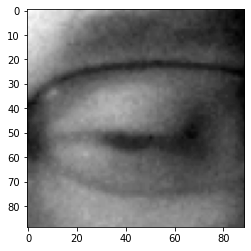

In [2]:
#Import the image from the file and plot it
img = cv2.imread('D:/General_Assembly/projetcs/Capstone Project/Train Images/Open Eyes/s0001_01805_0_1_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray');

In [3]:
#Check the image shape
img.shape

(89, 89)

In [34]:
#Select the directory and classes(open eyes or close eyes)
directory = 'D:/General_Assembly/projetcs/Capstone Project/Train Images/'  #directory where the images are located
classes = ['Open Eyes', 'Closed Eyes'] #there are two classes image which shows person with closed eyes and open eyes
# 0 will assing the images with open eyes and 1 with closed eyes

for index in classes:
    img_path = os.path.join(directory, index)
    print(f'{path} --> has index {classes.index(index)}')

D:/General_Assembly/projetcs/Capstone Project/Train Images/Closed Eyes --> has index 0
D:/General_Assembly/projetcs/Capstone Project/Train Images/Closed Eyes --> has index 1


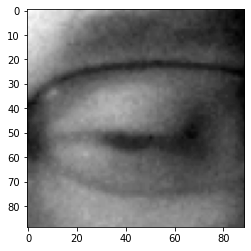

In [39]:
#Reading all images and show just one
for img_class in classes:
    path = os.path.join(directory, img_class)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        break
    break

(224, 224)


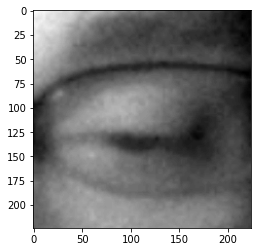

In [40]:
#Images are at a small image size. I will resize to 224
new_size = 224
img2 = cv2.resize(img_array, (new_size, new_size))
print(img2.shape)
plt.imshow(img2, cmap = 'gray');

(224, 224, 3)


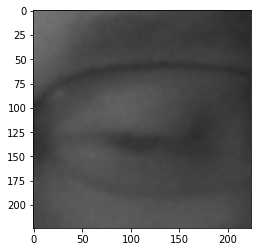

In [41]:
#Converting to RGB color image
img3 = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
print(img3.shape)
plt.imshow(img3, cmap = 'gray');

In [53]:
#Create a funtion to create the data and the label

data = []

def create_data_for_training():
    for img_class in classes:
        path = os.path.join(directory, img_class)
        class_num = classes.index(img_class) 
        for img in os.listdir(path):
            image = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
            image_resize = cv2.resize(image_rgb, (224, 224))
            data.append([image_resize, class_num])

In [54]:
#Create the data for training the model
create_data_for_training()

In [55]:
#Check the length of the data(number of images)
len(data)

6840

In [13]:
#Create X and y (images and labels)
X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)

In [14]:
#Convert to an array so i can reshape
X = np.array(X).reshape(-1, 224, 224, 3)

In [15]:
#Check the shape of X 
X.shape

(6840, 224, 224, 3)

In [16]:
#Normalize the X 
X = X / 255.0

In [17]:
#Convert y to array
y = np.array(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
#Save the X and y

with open('./Pickle Files/X_pickle', 'wb') as X_pickle_out:
    pickle.dump(X, X_pickle_out)
    
with open('./Pickle Files/y_pickle', 'wb') as y_pickle_out:
    pickle.dump(y, y_pickle_out)

In [2]:
#Load the X and y from pickle format

with open('./Pickle Files/X_pickle', 'rb') as X_picle_in:
    X = pickle.load(X_picle_in)

with open('./Pickle Files/y_pickle', 'rb') as y_pickle_in:
    y = pickle.load(y_pickle_in)

In [3]:
#Split X and y to train test split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [ ]:
#Pickle the X_train, X_test, y_train, y_test

with open('./Pickle Files/Train Test Split/X_train', 'wb') as Xtrain_pickle_out:
    pickle.dump(X_train, Xtrain_pickle_out)
    
with open('./Pickle Files/Train Test Split/X_test', 'wb') as Xtest_pickle_out:
    pickle.dump(X_test, Xtest_pickle_out)
    
with open('./Pickle Files/Train Test Split/y_train', 'wb') as ytrain_pickle_out:
    pickle.dump(y_train, ytrain_pickle_out)
    
with open('./Pickle Files/Train Test Split/y_test', 'wb') as ytest_pickle_out:
    pickle.dump(y_test, ytest_pickle_out)